In [1047]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import *
import seaborn as sns
from pandas import DataFrame
import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot



## Prepare Factors

In [1048]:
factors_load = pd.read_csv(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\factors.csv')\

## Remove columns that could be null in 2023, and player names
factors_prep = factors_load.drop(['matches_y','year_int','predicted_year'], axis = 1)

## Split out 2023 factors to run through model
factors_prep_23 = factors_prep.query('year_played == 2023').drop(['avg_score'], axis = 1)

# # Drop nulls (165 rows dropped, leaving 2837 after removing Nulls)
factors_prep = factors_prep.dropna(axis= 0, how='any')
factors_prep_23 = factors_prep_23.dropna(axis= 0, how='any')

## Remove Player Name so it doesn't treat as dummy variable
factors = factors_prep.drop(['player_name'], axis = 1)
factors_23 = factors_prep_23.drop(['player_name'], axis = 1)

# ## Convert position variables into category column. COuld also consider category_encoders sklearn package
factors['position_grouped'] = factors['position_grouped'].astype('category')

factors_23['position_grouped'] = factors_23['position_grouped'].astype('category')

# ## One hot encoding to convert category variables into dummy columns
factors = pd.get_dummies(factors)

factors_23 = pd.get_dummies(factors_23)


print(factors.shape)
print(factors_23.shape)


(1614, 181)
(491, 180)


## Load factors and limit data file to only those we want to focus on

In [1049]:
factors = factors[[
    'avg_score'
    ,'age_1yr'
    ,'years_active'
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    # ,'afl_fantasy_score_1yr'
    # ,'afl_fantasy_score_3yr'
    # ,'afl_fantasy_score_5yr'
    ,'fantasy_score_yearly_change'
    ,'fantasy_score_inyear_change'
    ,'kicks_1yr'
    ,'marks_1yr'
    ,'handballs_1yr'
    # ,'disposals_1yr'
    ,'position_grouped_BP'
    ,'position_grouped_C'
    ,'position_grouped_CHB'
    ,'position_grouped_CHF'
    ,'position_grouped_FB'
    ,'position_grouped_FF'
    ,'position_grouped_FP'
    ,'position_grouped_HBF'
    ,'position_grouped_HFF'
    ,'position_grouped_RUCK'
    ,'position_grouped_W'
    # ,'effective_disposals_1yr'
    # ,'disposal_efficiency_percentage_1yr'
    ,'goals_1yr'
    ,'behinds_1yr' 
    ,'hitouts_1yr'
    ,'tackles_1yr'
    ,'rebounds_1yr'
    ,'inside_fifties_1yr'
    ,'clearances_1yr'
    ,'clangers_1yr'
    ,'free_kicks_for_1yr'
    ,'free_kicks_against_1yr'
    ,'brownlow_votes_1yr'
    ,'contested_possessions_1yr'
    ,'uncontested_possessions_1yr'
    ,'contested_marks_1yr'
    ,'marks_inside_fifty_1yr'
    ,'one_percenters_1yr'
    ,'bounces_1yr'
    ,'goal_assists_1yr'
    ,'time_on_ground_percentage_1yr'
    ,'centre_clearances_1yr'
    ,'stoppage_clearances_1yr'
    ,'score_involvements_1yr'
    ,'metres_gained_1yr'
    ,'turnovers_1yr'
    ,'intercepts_1yr'
    ,'tackles_inside_fifty_1yr'
    ,'contest_def_losses_1yr'
    ,'contest_def_one_on_ones_1yr'
    ,'contest_off_one_on_ones_1yr'
    ,'contest_off_wins_1yr'
    ,'def_half_pressure_acts_1yr'
    ,'effective_kicks_1yr'
    ,'f50_ground_ball_gets_1yr'
    ,'ground_ball_gets_1yr'
    ,'hitouts_to_advantage_1yr'
    ,'hitout_win_percentage_1yr'
    ,'intercept_marks_1yr'
    ,'marks_on_lead_1yr'
    ,'pressure_acts_1yr'
    ,'rating_points_1yr'
    ,'ruck_contests_1yr'
    ,'score_launches_1yr'
    ,'shots_at_goal_1yr'
    ,'spoils_1yr'
    # ,'kicks_3yr'
    # ,'marks_3yr'
    # ,'handballs_3yr'
    # ,'disposals_3yr'
    # ,'effective_disposals_3yr'
    # ,'disposal_efficiency_percentage_3yr'
    # ,'goals_3yr'
    # ,'behinds_3yr'
    # ,'hitouts_3yr'
    # ,'tackles_3yr'
    # ,'rebounds_3yr'
    # ,'inside_fifties_3yr'
    # ,'clearances_3yr'
    # ,'clangers_3yr'
    # ,'free_kicks_for_3yr'
    # ,'free_kicks_against_3yr'
    # ,'brownlow_votes_3yr'
    # ,'contested_possessions_3yr'
    # ,'uncontested_possessions_3yr'
    # ,'contested_marks_3yr'
    # ,'marks_inside_fifty_3yr'
    # ,'one_percenters_3yr'
    # ,'bounces_3yr'
    # ,'goal_assists_3yr'
    # ,'time_on_ground_percentage_3yr'
    # ,'centre_clearances_3yr'
    # ,'stoppage_clearances_3yr'
    # ,'score_involvements_3yr'
    # ,'metres_gained_3yr'
    # ,'turnovers_3yr'
    # ,'intercepts_3yr'
    # ,'tackles_inside_fifty_3yr'
    # ,'contest_def_losses_3yr'
    # ,'contest_def_one_on_ones_3yr'
    # ,'contest_off_one_on_ones_3yr'
    # ,'contest_off_wins_3yr'
    # ,'def_half_pressure_acts_3yr'
    # ,'effective_kicks_3yr'
    # ,'f50_ground_ball_gets_3yr'
    # ,'ground_ball_gets_3yr'
    # ,'hitouts_to_advantage_3yr'
    # ,'hitout_win_percentage_3yr'
    # ,'intercept_marks_3yr'
    # ,'marks_on_lead_3yr'
    # ,'pressure_acts_3yr'
    # ,'rating_points_3yr'
    # ,'ruck_contests_3yr'
    # ,'score_launches_3yr'
    # ,'shots_at_goal_3yr'
    # ,'spoils_3yr'
    # ,'kicks_5yr'
    # ,'marks_5yr'
    # ,'handballs_5yr'
    # ,'disposals_5yr'
    # ,'effective_disposals_5yr'
    # ,'disposal_efficiency_percentage_5yr'
    # ,'goals_5yr'
    # ,'behinds_5yr'
    # ,'hitouts_5yr'
    # ,'tackles_5yr'
    # ,'rebounds_5yr'
    # ,'inside_fifties_5yr'
    # ,'clearances_5yr'
    # ,'clangers_5yr'
    # ,'free_kicks_for_5yr'
    # ,'free_kicks_against_5yr'
    # ,'brownlow_votes_5yr'
    # ,'contested_possessions_5yr'
    # ,'uncontested_possessions_5yr'
    # ,'contested_marks_5yr'
    # ,'marks_inside_fifty_5yr'
    # ,'one_percenters_5yr'
    # ,'bounces_5yr'
    # ,'goal_assists_5yr'
    # ,'time_on_ground_percentage_5yr'
    # ,'centre_clearances_5yr'
    # ,'stoppage_clearances_5yr'
    # ,'score_involvements_5yr'
    # ,'metres_gained_5yr'
    # ,'turnovers_5yr'
    # ,'intercepts_5yr'
    # ,'tackles_inside_fifty_5yr'
    # ,'contest_def_losses_5yr'
    # ,'contest_def_one_on_ones_5yr'
    # ,'contest_off_one_on_ones_5yr'
    # ,'contest_off_wins_5yr'
    # ,'def_half_pressure_acts_5yr'
    # ,'effective_kicks_5yr'
    # ,'f50_ground_ball_gets_5yr'
    # ,'ground_ball_gets_5yr'
    # ,'hitouts_to_advantage_5yr'
    # ,'hitout_win_percentage_5yr'
    # ,'intercept_marks_5yr'
    # ,'marks_on_lead_5yr'
    # ,'pressure_acts_5yr'
    # ,'rating_points_5yr'
    # ,'ruck_contests_5yr'
    # ,'score_launches_5yr'
    # ,'shots_at_goal_5yr'
    # ,'spoils_5yr'
]]

factors

,avg_score,age_1yr,years_active,player_height_cm_1yr,player_weight_kg_1yr,fantasy_score_yearly_change,fantasy_score_inyear_change,kicks_1yr,marks_1yr,handballs_1yr,...,hitouts_to_advantage_1yr,hitout_win_percentage_1yr,intercept_marks_1yr,marks_on_lead_1yr,pressure_acts_1yr,rating_points_1yr,ruck_contests_1yr,score_launches_1yr,shots_at_goal_1yr,spoils_1yr
11,77.888889,21.0,7,193.0,92.0,10.475962,6.745455,10.000000,3.562500,7.750000,...,0.437500,6.250000,0.437500,0.000000,13.750000,8.900000,0.062500,1.062500,1.312500,0.500000
12,80.500000,22.0,7,193.0,92.0,7.742547,-14.000000,9.888889,4.500000,10.444444,...,0.000000,1.850000,0.611111,0.333333,17.277778,10.722222,0.388889,1.111111,0.888889,0.277778
14,86.250000,26.0,7,193.0,92.0,0.000000,-3.250000,10.222222,3.722222,7.666667,...,0.055556,6.038889,0.166667,0.055556,13.722222,6.422222,3.277778,0.666667,0.333333,0.888889
15,86.480000,27.0,7,193.0,92.0,9.565789,-5.222222,14.350000,5.750000,7.350000,...,0.000000,0.000000,0.850000,0.200000,14.000000,8.840000,0.000000,1.300000,0.800000,0.700000
22,72.900000,23.0,5,192.0,98.0,0.000000,-19.583333,8.636364,5.727273,7.636364,...,0.000000,0.000000,1.818182,0.000000,8.272727,9.581818,0.181818,0.636364,0.181818,6.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,96.545455,28.0,10,175.0,77.0,10.952381,-6.709091,16.238095,3.761905,8.809524,...,0.000000,0.000000,0.190476,0.428571,26.809524,16.414286,0.047619,1.857143,3.285714,0.333333
6406,81.863636,32.0,10,175.0,77.0,0.000000,16.427273,16.782609,5.304348,7.347826,...,0.000000,0.000000,0.521739,0.434783,25.565217,16.226087,0.086957,2.043478,1.956522,0.391304
6407,84.450000,33.0,10,175.0,77.0,-12.736364,-20.411111,14.681818,5.772727,5.181818,...,0.000000,0.000000,0.636364,0.363636,14.545455,10.204545,0.000000,1.045455,0.863636,0.409091
6410,59.000000,23.0,4,190.0,91.0,0.000000,14.070707,8.150000,3.750000,3.600000,...,0.000000,0.000000,0.050000,0.900000,11.950000,7.340000,0.000000,0.500000,3.100000,0.400000


In [1050]:
factors_23 = factors_23[[
     'age_1yr'
    ,'years_active'
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    # ,'afl_fantasy_score_1yr'
    # ,'afl_fantasy_score_3yr'
    # ,'afl_fantasy_score_5yr'
    ,'fantasy_score_yearly_change'
    ,'fantasy_score_inyear_change'
    ,'kicks_1yr'
    ,'marks_1yr'
    ,'handballs_1yr'
    # ,'disposals_1yr'
    ,'position_grouped_BP'
    ,'position_grouped_C'
    ,'position_grouped_CHB'
    ,'position_grouped_CHF'
    ,'position_grouped_FB'
    ,'position_grouped_FF'
    ,'position_grouped_FP'
    ,'position_grouped_HBF'
    ,'position_grouped_HFF'
    ,'position_grouped_RUCK'
    ,'position_grouped_W'
    # ,'effective_disposals_1yr'
    # ,'disposal_efficiency_percentage_1yr'
    ,'goals_1yr'
    ,'behinds_1yr' 
    ,'hitouts_1yr'
    ,'tackles_1yr'
    ,'rebounds_1yr'
    ,'inside_fifties_1yr'
    ,'clearances_1yr'
    ,'clangers_1yr'
    ,'free_kicks_for_1yr'
    ,'free_kicks_against_1yr'
    ,'brownlow_votes_1yr'
    ,'contested_possessions_1yr'
    ,'uncontested_possessions_1yr'
    ,'contested_marks_1yr'
    ,'marks_inside_fifty_1yr'
    ,'one_percenters_1yr'
    ,'bounces_1yr'
    ,'goal_assists_1yr'
    ,'time_on_ground_percentage_1yr'
    ,'centre_clearances_1yr'
    ,'stoppage_clearances_1yr'
    ,'score_involvements_1yr'
    ,'metres_gained_1yr'
    ,'turnovers_1yr'
    ,'intercepts_1yr'
    ,'tackles_inside_fifty_1yr'
    ,'contest_def_losses_1yr'
    ,'contest_def_one_on_ones_1yr'
    ,'contest_off_one_on_ones_1yr'
    ,'contest_off_wins_1yr'
    ,'def_half_pressure_acts_1yr'
    ,'effective_kicks_1yr'
    ,'f50_ground_ball_gets_1yr'
    ,'ground_ball_gets_1yr'
    ,'hitouts_to_advantage_1yr'
    ,'hitout_win_percentage_1yr'
    ,'intercept_marks_1yr'
    ,'marks_on_lead_1yr'
    ,'pressure_acts_1yr'
    ,'rating_points_1yr'
    ,'ruck_contests_1yr'
    ,'score_launches_1yr'
    ,'shots_at_goal_1yr'
    ,'spoils_1yr'
    # ,'kicks_3yr'
    # ,'marks_3yr'
    # ,'handballs_3yr'
    # ,'disposals_3yr'
    # ,'effective_disposals_3yr'
    # ,'disposal_efficiency_percentage_3yr'
    # ,'goals_3yr'
    # ,'behinds_3yr'
    # ,'hitouts_3yr'
    # ,'tackles_3yr'
    # ,'rebounds_3yr'
    # ,'inside_fifties_3yr'
    # ,'clearances_3yr'
    # ,'clangers_3yr'
    # ,'free_kicks_for_3yr'
    # ,'free_kicks_against_3yr'
    # ,'brownlow_votes_3yr'
    # ,'contested_possessions_3yr'
    # ,'uncontested_possessions_3yr'
    # ,'contested_marks_3yr'
    # ,'marks_inside_fifty_3yr'
    # ,'one_percenters_3yr'
    # ,'bounces_3yr'
    # ,'goal_assists_3yr'
    # ,'time_on_ground_percentage_3yr'
    # ,'centre_clearances_3yr'
    # ,'stoppage_clearances_3yr'
    # ,'score_involvements_3yr'
    # ,'metres_gained_3yr'
    # ,'turnovers_3yr'
    # ,'intercepts_3yr'
    # ,'tackles_inside_fifty_3yr'
    # ,'contest_def_losses_3yr'
    # ,'contest_def_one_on_ones_3yr'
    # ,'contest_off_one_on_ones_3yr'
    # ,'contest_off_wins_3yr'
    # ,'def_half_pressure_acts_3yr'
    # ,'effective_kicks_3yr'
    # ,'f50_ground_ball_gets_3yr'
    # ,'ground_ball_gets_3yr'
    # ,'hitouts_to_advantage_3yr'
    # ,'hitout_win_percentage_3yr'
    # ,'intercept_marks_3yr'
    # ,'marks_on_lead_3yr'
    # ,'pressure_acts_3yr'
    # ,'rating_points_3yr'
    # ,'ruck_contests_3yr'
    # ,'score_launches_3yr'
    # ,'shots_at_goal_3yr'
    # ,'spoils_3yr'
    # ,'kicks_5yr'
    # ,'marks_5yr'
    # ,'handballs_5yr'
    # ,'disposals_5yr'
    # ,'effective_disposals_5yr'
    # ,'disposal_efficiency_percentage_5yr'
    # ,'goals_5yr'
    # ,'behinds_5yr'
    # ,'hitouts_5yr'
    # ,'tackles_5yr'
    # ,'rebounds_5yr'
    # ,'inside_fifties_5yr'
    # ,'clearances_5yr'
    # ,'clangers_5yr'
    # ,'free_kicks_for_5yr'
    # ,'free_kicks_against_5yr'
    # ,'brownlow_votes_5yr'
    # ,'contested_possessions_5yr'
    # ,'uncontested_possessions_5yr'
    # ,'contested_marks_5yr'
    # ,'marks_inside_fifty_5yr'
    # ,'one_percenters_5yr'
    # ,'bounces_5yr'
    # ,'goal_assists_5yr'
    # ,'time_on_ground_percentage_5yr'
    # ,'centre_clearances_5yr'
    # ,'stoppage_clearances_5yr'
    # ,'score_involvements_5yr'
    # ,'metres_gained_5yr'
    # ,'turnovers_5yr'
    # ,'intercepts_5yr'
    # ,'tackles_inside_fifty_5yr'
    # ,'contest_def_losses_5yr'
    # ,'contest_def_one_on_ones_5yr'
    # ,'contest_off_one_on_ones_5yr'
    # ,'contest_off_wins_5yr'
    # ,'def_half_pressure_acts_5yr'
    # ,'effective_kicks_5yr'
    # ,'f50_ground_ball_gets_5yr'
    # ,'ground_ball_gets_5yr'
    # ,'hitouts_to_advantage_5yr'
    # ,'hitout_win_percentage_5yr'
    # ,'intercept_marks_5yr'
    # ,'marks_on_lead_5yr'
    # ,'pressure_acts_5yr'
    # ,'rating_points_5yr'
    # ,'ruck_contests_5yr'
    # ,'score_launches_5yr'
    # ,'shots_at_goal_5yr'
    # ,'spoils_5yr'
    ]]

factors_23

,age_1yr,years_active,player_height_cm_1yr,player_weight_kg_1yr,fantasy_score_yearly_change,fantasy_score_inyear_change,kicks_1yr,marks_1yr,handballs_1yr,position_grouped_BP,...,hitouts_to_advantage_1yr,hitout_win_percentage_1yr,intercept_marks_1yr,marks_on_lead_1yr,pressure_acts_1yr,rating_points_1yr,ruck_contests_1yr,score_launches_1yr,shots_at_goal_1yr,spoils_1yr
16,28.0,7,193.0,92.0,5.908571,-5.461538,12.760000,5.480000,10.280000,False,...,0.0,0.0,0.960000,0.000000,14.680000,10.684000,0.0,1.400000,0.960000,1.120000
36,30.0,10,181.0,85.0,-8.173123,14.572650,9.652174,3.391304,8.782609,False,...,0.0,0.0,0.086957,0.304348,18.782609,9.639130,0.0,1.391304,1.260870,0.130435
58,26.0,6,183.0,80.0,3.527778,41.500000,6.750000,3.500000,3.750000,False,...,0.0,0.0,0.500000,0.250000,9.666667,6.558333,0.0,0.250000,1.166667,0.916667
63,25.0,5,178.0,77.0,0.628571,8.634615,10.857143,4.761905,6.809524,False,...,0.0,0.0,0.190476,0.761905,13.809524,9.995238,0.0,0.761905,2.095238,0.285714
71,28.0,8,183.0,83.0,0.092308,3.000000,11.200000,4.000000,8.600000,False,...,0.0,0.0,0.650000,0.050000,13.150000,8.745000,0.0,1.000000,0.500000,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,25.0,1,196.0,97.0,0.000000,4.474359,6.789474,2.894737,2.526316,True,...,0.0,0.0,1.315789,0.000000,6.631579,7.994737,0.0,0.789474,0.000000,7.105263
6386,25.0,3,195.0,91.0,0.877273,0.760684,7.454545,5.454545,4.681818,False,...,0.0,0.0,2.181818,0.000000,6.545455,9.959091,0.0,1.181818,0.000000,6.363636
6398,32.0,12,188.0,89.0,5.329912,-25.783333,17.681818,6.772727,4.500000,True,...,0.0,0.0,1.909091,0.045455,7.681818,8.490909,0.0,1.181818,0.272727,2.454545
6408,34.0,10,175.0,77.0,-7.026923,2.263889,13.600000,5.900000,5.300000,False,...,0.0,0.0,0.050000,0.300000,16.050000,8.690000,0.0,1.050000,0.950000,0.400000


<!-- y = factors['avg_score']
<!-- 
X = factors [
     'years_active'
    ,'position_grouped' 
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    ,'afl_fantasy_score_1yr'
    ,'afl_fantasy_score_3yr'
    ,'afl_fantasy_score_5yr'
    ,'position_grouped_FB'
    ,'position_grouped_BP'
    ,'position_grouped_CHB'
    ,'position_grouped_HBF'
    ,'position_grouped_RUCK'
    ,'position_grouped_C'
    ,'position_grouped_W'
    ,'position_grouped_FF'
    ,'position_grouped_FP'
    ,'position_grouped_HFF'
    ,'position_grouped_CHF' 


X = factors [
    ,'years_active'
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    ,'kicks_1yr'
    ,'marks_1yr'
    ,'handballs_1yr'
    ,'disposals_1yr'
    ,'effective_disposals_1yr'
    ,'disposal_efficiency_percentage_1yr'
    ,'goals_1yr'
    ,'behinds_1yr' 
    ,'hitouts_1yr'
    ,'tackles_1yr'
    ,'rebounds_1yr'
    ,'inside_fifties_1yr'
    ,'clearances_1yr'
    ,'clangers_1yr'
    ,'free_kicks_for_1yr'
    ,'free_kicks_against_1yr'
    ,'brownlow_votes_1yr'
    ,'contested_possessions_1yr'
    ,'uncontested_possessions_1yr'
    ,'contested_marks_1yr'
    ,'marks_inside_fifty_1yr'
    ,'one_percenters_1yr'
    ,'bounces_1yr'
    ,'goal_assists_1yr'
    ,'time_on_ground_percentage_1yr'
    ,'centre_clearances_1yr'
    ,'stoppage_clearances_1yr'
    ,'score_involvements_1yr'
    ,'metres_gained_1yr'
    ,'turnovers_1yr'
    ,'intercepts_1yr'
    ,'tackles_inside_fifty_1yr'
    ,'contest_def_losses_1yr'
    ,'contest_def_one_on_ones_1yr'
    ,'contest_off_one_on_ones_1yr'
    ,'contest_off_wins_1yr'
    ,'def_half_pressure_acts_1yr'
    ,'effective_kicks_1yr'
    ,'f50_ground_ball_gets_1yr'
    ,'ground_ball_gets_1yr'
    ,'hitouts_to_advantage_1yr'
    ,'hitout_win_percentage_1yr'
    ,'intercept_marks_1yr'
    ,'marks_on_lead_1yr'
    ,'pressure_acts_1yr'
    ,'rating_points_1yr'
    ,'ruck_contests_1yr'
    ,'score_launches_1yr'
    ,'shots_at_goal_1yr'
    ,'spoils_1yr'
    ,'player_height_cm_3yr'
    ,'player_weight_kg_3yr'
    ,'kicks_3yr'
    ,'marks_3yr'
    ,'handballs_3yr'
    ,'disposals_3yr'
    ,'effective_disposals_3yr'
    ,'disposal_efficiency_percentage_3yr'
    ,'goals_3yr'
    ,'behinds_3yr'
    ,'hitouts_3yr'
    ,'tackles_3yr'
    ,'rebounds_3yr'
    ,'inside_fifties_3yr'
    ,'clearances_3yr'
    ,'clangers_3yr'
    ,'free_kicks_for_3yr'
    ,'free_kicks_against_3yr'
    ,'brownlow_votes_3yr'
    ,'contested_possessions_3yr'
    ,'uncontested_possessions_3yr'
    ,'contested_marks_3yr'
    ,'marks_inside_fifty_3yr'
    ,'one_percenters_3yr'
    ,'bounces_3yr'
    ,'goal_assists_3yr'
    ,'time_on_ground_percentage_3yr'
    ,'centre_clearances_3yr'
    ,'stoppage_clearances_3yr'
    ,'score_involvements_3yr'
    ,'metres_gained_3yr'
    ,'turnovers_3yr'
    ,'intercepts_3yr'
    ,'tackles_inside_fifty_3yr'
    ,'contest_def_losses_3yr'
    ,'contest_def_one_on_ones_3yr'
    ,'contest_off_one_on_ones_3yr'
    ,'contest_off_wins_3yr'
    ,'def_half_pressure_acts_3yr'
    ,'effective_kicks_3yr'
    ,'f50_ground_ball_gets_3yr'
    ,'ground_ball_gets_3yr'
    ,'hitouts_to_advantage_3yr'
    ,'hitout_win_percentage_3yr'
    ,'intercept_marks_3yr'
    ,'marks_on_lead_3yr'
    ,'pressure_acts_3yr'
    ,'rating_points_3yr'
    ,'ruck_contests_3yr'
    ,'score_launches_3yr'
    ,'shots_at_goal_3yr'
    ,'spoils_3yr'
    ,'player_height_cm_5yr'
    ,'player_weight_kg_5yr'
    ,'kicks_5yr'
    ,'marks_5yr'
    ,'handballs_5yr'
    ,'disposals_5yr'
    ,'effective_disposals_5yr'
    ,'disposal_efficiency_percentage_5yr'
    ,'goals_5yr'
    ,'behinds_5yr'
    ,'hitouts_5yr'
    ,'tackles_5yr'
    ,'rebounds_5yr'
    ,'inside_fifties_5yr'
    ,'clearances_5yr'
    ,'clangers_5yr'
    ,'free_kicks_for_5yr'
    ,'free_kicks_against_5yr'
    ,'brownlow_votes_5yr'
    ,'contested_possessions_5yr'
    ,'uncontested_possessions_5yr'
    ,'contested_marks_5yr'
    ,'marks_inside_fifty_5yr'
    ,'one_percenters_5yr'
    ,'bounces_5yr'
    ,'goal_assists_5yr'
    ,'time_on_ground_percentage_5yr'
    ,'centre_clearances_5yr'
    ,'stoppage_clearances_5yr'
    ,'score_involvements_5yr'
    ,'metres_gained_5yr'
    ,'turnovers_5yr'
    ,'intercepts_5yr'
    ,'tackles_inside_fifty_5yr'
    ,'contest_def_losses_5yr'
    ,'contest_def_one_on_ones_5yr'
    ,'contest_off_one_on_ones_5yr'
    ,'contest_off_wins_5yr'
    ,'def_half_pressure_acts_5yr'
    ,'effective_kicks_5yr'
    ,'f50_ground_ball_gets_5yr'
    ,'ground_ball_gets_5yr'
    ,'hitouts_to_advantage_5yr'
    ,'hitout_win_percentage_5yr'
    ,'intercept_marks_5yr'
    ,'marks_on_lead_5yr'
    ,'pressure_acts_5yr'
    ,'rating_points_5yr'
    ,'ruck_contests_5yr'
    ,'score_launches_5yr'
    ,'shots_at_goal_5yr'
    ,'spoils_5yr'
    ,'position_grouped_FB'
    ,'position_grouped_BP'
    ,'position_grouped_CHB'
    ,'position_grouped_HBF'
    ,'position_grouped_RUCK'
    ,'position_grouped_C'
    ,'position_grouped_W'
    ,'position_grouped_FF'
    ,'position_grouped_FP'
    ,'position_grouped_HFF'
    ,'position_grouped_CHF']
    .drop()
  -->

In [1051]:
y = factors['avg_score']

X = factors.drop(['avg_score'], axis = 1)

X_new = factors_23

In [1052]:
X_new.shape

(491, 64)

In [1053]:
from sklearn.model_selection import train_test_split

pd.DataFrame(X).fillna(0)

X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.80, 
    random_state = 1)


from sklearn.linear_model import LinearRegression

lr = LinearRegression()

## Build the model using the training data.

lr.fit(X_train,y_train)

LinearRegression()

Feature: 0, Score: -0.92033
Feature: 1, Score: 0.60001
Feature: 2, Score: 0.01060
Feature: 3, Score: 0.10573
Feature: 4, Score: -0.33009
Feature: 5, Score: 0.01186
Feature: 6, Score: 0.05084
Feature: 7, Score: -0.12338
Feature: 8, Score: 0.17682
Feature: 9, Score: -1.91717
Feature: 10, Score: -0.70236
Feature: 11, Score: 0.30154
Feature: 12, Score: 0.01804
Feature: 13, Score: -0.03373
Feature: 14, Score: 0.39312
Feature: 15, Score: 1.38048
Feature: 16, Score: -2.68318
Feature: 17, Score: 0.03820
Feature: 18, Score: 3.68950
Feature: 19, Score: -0.48444
Feature: 20, Score: 1.12735
Feature: 21, Score: 0.73900
Feature: 22, Score: 2.74712
Feature: 23, Score: 2.72811
Feature: 24, Score: 0.88934
Feature: 25, Score: -1.89129
Feature: 26, Score: 6.83827
Feature: 27, Score: -0.60361
Feature: 28, Score: -2.33452
Feature: 29, Score: 0.15254
Feature: 30, Score: -3.12754
Feature: 31, Score: 2.88521
Feature: 32, Score: 1.91060
Feature: 33, Score: 0.04377
Feature: 34, Score: -2.41928
Feature: 35, Scor

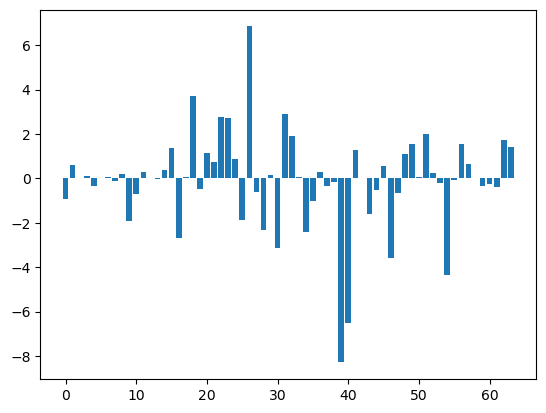

In [1054]:
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


# df = pd.DataFrame(factors.data,columns=factors.feature_names)

# columns = factors[feature_names]
# # coefficients = lr.coef_


# plt.figure(figsize=(10,6))
# plt.barh(columns, coefficients)
# plt.xlabel("Feature Importance")

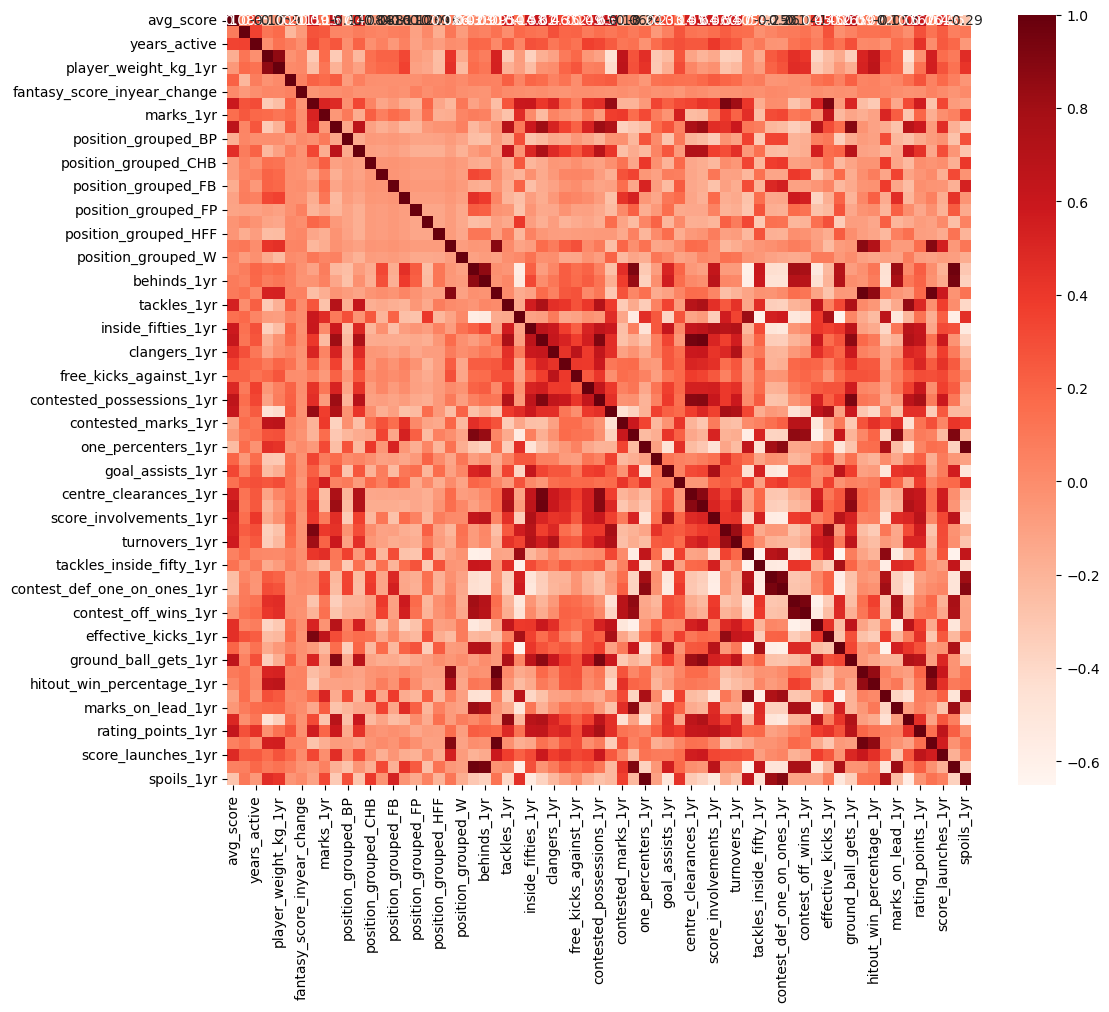

In [1055]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = factors.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1056]:
import statsmodels.api as sm
#Correlation with output variable
cor_target = abs(cor["avg_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

avg_score                      1.000000
kicks_1yr                      0.592488
handballs_1yr                  0.667251
tackles_1yr                    0.535053
inside_fifties_1yr             0.575845
clearances_1yr                 0.616787
contested_possessions_1yr      0.654640
uncontested_possessions_1yr    0.613967
centre_clearances_1yr          0.547060
stoppage_clearances_1yr        0.635336
score_involvements_1yr         0.557252
metres_gained_1yr              0.541079
turnovers_1yr                  0.573327
ground_ball_gets_1yr           0.654941
pressure_acts_1yr              0.500898
rating_points_1yr              0.623501
Name: avg_score, dtype: float64

In [1057]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, step = 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False False  True  True False
 False False False  True  True  True  True False  True  True  True  True
  True  True  True  True  True False False  True  True False  True  True
 False  True False  True  True  True False False  True False False  True
 False  True False  True False False  True False  True False False False
 False  True False  True]
[3 4 6 6 4 6 1 5 2 1 1 2 4 3 5 1 1 1 1 4 1 1 1 1 1 1 1 1 1 4 2 1 1 5 1 1 5
 1 5 1 1 1 6 2 1 3 3 1 3 1 6 1 4 3 1 6 1 4 5 6 5 1 3 1]


In [1058]:
#no of features
nof_list=np.arange(1,50)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,step = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 27
Score with 27 features: 0.611715


In [1059]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, step = 3)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['kicks_1yr', 'handballs_1yr', 'position_grouped_BP',
       'position_grouped_FP', 'position_grouped_HBF', 'position_grouped_RUCK',
       'goals_1yr', 'behinds_1yr', 'hitouts_1yr', 'tackles_1yr',
       'rebounds_1yr', 'inside_fifties_1yr', 'clearances_1yr',
       'free_kicks_for_1yr', 'contested_possessions_1yr',
       'uncontested_possessions_1yr', 'marks_inside_fifty_1yr',
       'one_percenters_1yr', 'goal_assists_1yr', 'centre_clearances_1yr',
       'stoppage_clearances_1yr', 'score_involvements_1yr', 'turnovers_1yr',
       'intercepts_1yr', 'contest_def_one_on_ones_1yr',
       'contest_off_one_on_ones_1yr', 'contest_off_wins_1yr',
       'effective_kicks_1yr', 'hitouts_to_advantage_1yr',
       'intercept_marks_1yr', 'score_launches_1yr', 'spoils_1yr'],
      dtype='object')


In [1060]:
## Test data error
lr.score(X_test, y_test).round(3)


0.663

In [1061]:
## Train data error
lr.score(X_train, y_train).round(3)

0.68

In [1062]:
#create linear regression model
from sklearn.linear_model import LinearRegression
lineg_model = LinearRegression()
#fit linear regression to the training data
lineg_model.fit(X_train, y_train)
#predict y-value based on testing data
y_pred = lineg_model.predict(X_test)

#comparing y-value actual and prediction of testing data
df_compare = pd.DataFrame({'Actual' : y_test, 'Prediction': y_pred})

model_output = df_compare.join(factors_load, lsuffix='_caller', rsuffix='_other', how='inner')

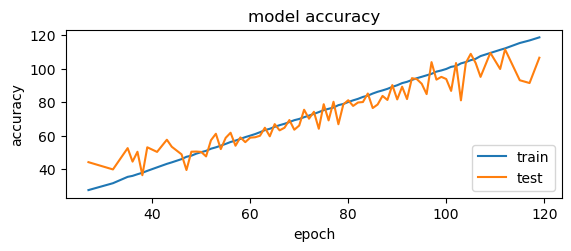

In [1063]:
y_test_df = pd.DataFrame({'Actual' : y_test})

model_acc = y_test_df.join(factors_load, lsuffix='_caller', rsuffix='_other', how='inner')
model_acc
acc_chart = model_acc.groupby(round(model_output['Actual'])).agg({'afl_fantasy_score_1yr': 'mean', 'Actual': 'mean'})

# acc_chart.sort_values(by=['Actual'], ascending=True)

plt.subplot(2,1,1)
plt.plot(acc_chart['Actual'])
plt.plot(acc_chart['afl_fantasy_score_1yr'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


In [1064]:

#predict using new data 
y_pred_new = lineg_model.predict(X_new)
y_pred_new = pd.DataFrame({'Predicted' : y_pred_new})

X_new_reset = X_new.reset_index()
factors_23_reset = factors_prep_23.reset_index()

pred_output = y_pred_new.join(factors_23_reset, lsuffix='_caller', rsuffix='_other', how='left')

# Write predictions to csv
# pred_output.to_csv(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Outputs\Model_pred.csv')

print(factors_prep_23.shape)
print(X_new.shape)

(491, 171)
(491, 64)


In [1065]:
## Sort by highest predicted score
pd.set_option('display.max_rows', 50)

pred_output['upside'] = pred_output['Predicted'] - pred_output['afl_fantasy_score_1yr']

pred_output[['player_name','age_1yr', 'matches_x','Predicted','afl_fantasy_score_1yr', 'upside']].sort_values(by=['Predicted'], ascending=False).head(20)

,player_name,age_1yr,matches_x,Predicted,afl_fantasy_score_1yr,upside
242,"Laird, Rory",30.0,22,106.925622,109.227273,-2.301650
166,"Green, Tom",22.0,22,104.072228,108.727273,-4.655044
43,"Brayshaw, Andrew",24.0,23,103.691502,110.347826,-6.656325
107,"Daicos, Nick",20.0,22,103.389997,108.409091,-5.019094
339,"Oliver, Clayton",26.0,15,103.382752,115.066667,-11.683915
38,"Bontempelli, Marcus",28.0,23,103.280053,116.956522,-13.676468
454,"Walsh, Sam",23.0,18,102.778493,97.944444,4.834048
116,"Dawson, Jordan",26.0,23,101.834722,113.434783,-11.600061
113,"Darcy, Sean",25.0,15,101.663878,95.400000,6.263878
438,"Taranto, Tim",25.0,23,101.038122,112.434783,-11.396661


In [1066]:
pred_output[['player_name','age_1yr', 'matches_x','Predicted','afl_fantasy_score_1yr', 'upside']].sort_values(by=['afl_fantasy_score_1yr'], ascending=False).head(20)

,player_name,age_1yr,matches_x,Predicted,afl_fantasy_score_1yr,upside
136,"English, Tim",26.0,23,95.382762,118.695652,-23.312890
38,"Bontempelli, Marcus",28.0,23,103.280053,116.956522,-13.676468
269,"Marshall, Rowan",28.0,24,100.342542,116.750000,-16.407458
339,"Oliver, Clayton",26.0,15,103.382752,115.066667,-11.683915
116,"Dawson, Jordan",26.0,23,101.834722,113.434783,-11.600061
306,"Merrett, Zach",28.0,22,100.666394,112.863636,-12.197242
438,"Taranto, Tim",25.0,23,101.038122,112.434783,-11.396661
174,"Gulden, Errol",21.0,24,95.369555,112.250000,-16.880445
43,"Brayshaw, Andrew",24.0,23,103.691502,110.347826,-6.656325
242,"Laird, Rory",30.0,22,106.925622,109.227273,-2.301650


In [1067]:
pred_output[['player_name','age_1yr', 'matches_x','Predicted','afl_fantasy_score_1yr', 'upside']].sort_values(by=['upside'], ascending=False)\
    .query('Predicted >= 80').head(20)

,player_name,age_1yr,matches_x,Predicted,afl_fantasy_score_1yr,upside
482,"Xerri, Tristan",24.0,9,80.594457,66.000000,14.594457
172,"Grundy, Brodie",29.0,17,87.418828,75.000000,12.418828
190,"Hewett, George",28.0,22,81.992240,73.772727,8.219513
476,"Wines, Ollie",29.0,25,83.024939,75.160000,7.864939
113,"Darcy, Sean",25.0,15,101.663878,95.400000,6.263878
458,"Ward, Josh",20.0,16,80.764456,74.875000,5.889456
414,"Simpkin, Jy",25.0,18,81.654199,75.777778,5.876422
418,"Smith, Bailey",23.0,19,89.108168,83.263158,5.845010
94,"Cripps, Patrick",28.0,24,92.646148,87.500000,5.146148
337,"O'Meara, Jaeger",29.0,21,80.419957,75.428571,4.991385


In [1068]:
data_new = X_train
results = lr.predict(data_new)

np.savetxt(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\predictions.csv', results)
results

array([ 75.10964862,  73.16026888,  89.9459417 , ...,  73.12780704,
       101.38542715,  74.83866254])

In [1069]:
np.savetxt(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\train.csv', y_train)
y_train

4482    70.045455
5406    85.727273
5010    69.615385
5986    61.400000
443     89.681818
          ...    
2990    73.277778
3259    90.545455
4778    80.823529
2154    94.080000
2610    76.235294
Name: avg_score, Length: 1291, dtype: float64

In [1070]:
sns.pairplot(
    factors[["age_1yr", "avg_score", "player_height_cm_1yr", "player_weight_kg_1yr","afl_fantasy_score_1yr"]],
    # hue = "position_grouped",
    height = 3)
    # palette = "Set1")

KeyError: "['afl_fantasy_score_1yr'] not in index"

In [ ]:
sns.heatmap(joined_data[["age", "afl_fantasy_score", "player_height_cm", "player_weight_kg"]].corr(), annot= True)

NameError: name 'joined_data' is not defined